# Modelovani

- Model predikujici aktivitni cislo
- regrese


- na ar_ligands.csv si natrenujeme model 
    - rozdeleni na trenovaci a testovaci mnozinu
    - model selection (scikit learn)
    
    
- Random forest    

In [59]:
from rdkit.Chem import AllChem as Chem

#aby to vykreslovalo molekuly
from rdkit.Chem.Draw import IPythonConsole 

#nacteni CSV
import pandas as pd

#deleni dat do mnozin + cross validace
from sklearn import model_selection

#regese
from sklearn.ensemble import RandomForestRegressor

#graf
import seaborn as sns

#mira korelace
from sklearn.metrics import r2_score, mean_squared_error
import math

#MQN
from rdkit.Chem import rdMolDescriptors

## Zpracovani csv

In [6]:
#nacteni naseho souboru
data = pd.read_csv('../data/ar_ligands.csv')

In [7]:
#potrebujeme SMILES a standardni/pChEMBL hodnotu
data

,Canonical Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,#Ro5 Violations,Molecular Weight,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,ALogP
0,Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F,IC50,0.02,nM,10.70,0,263.22,NaN,NaN,NaN,NaN,3.95
1,CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F,IC50,7.00,nM,8.15,0,257.26,31.70,0.62,4.94,20.43,3.21
2,CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F,IC50,6.00,nM,8.22,0,297.24,27.66,0.53,5.81,11.23,2.41
3,CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,IC50,1.00,nM,9.00,0,283.25,31.77,0.61,5.27,21.31,3.73
4,[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...,IC50,2.90,nM,8.54,1,370.79,23.03,0.45,3.27,10.00,5.27
5,CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...,IC50,2.00,nM,8.70,0,300.44,28.95,0.54,4.51,23.32,4.19
6,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,IC50,2.20,nM,8.66,1,429.60,20.15,0.37,3.25,21.36,5.41
7,CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...,IC50,9.30,nM,8.03,0,465.43,NaN,NaN,NaN,NaN,3.09
8,C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N,IC50,3.20,nM,8.49,0,365.36,23.25,0.43,6.20,8.73,2.29
9,C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N,IC50,2.40,nM,8.62,0,401.26,21.48,0.47,5.58,11.72,3.04


In [9]:
# 1 .sloupec
data["Canonical Smiles"]

0                       Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F
1                      CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F
2             CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F
3                   CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F
4      [O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...
5      CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...
6      CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...
7      CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...
8      C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N
9        C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N
10     CC(=O)O[C@@]1(CCC2C3C=C(Cl)C4=CC(=O)[C@@H]5CC5...
11     CC1(C)NC(=O)N(C1=O)c2ccc(c(c2)C(F)(F)F)[N+](=O...
12     CCCCCCCCCC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=C...
13      C[C@]12CCC3C(CCC4=CC(=O)CC[C@]34C=C)C1CC[C@@H]2O
14               CC1(C)CCc2cc3C(=CC(=O)Oc3cc2N1)C(F)(F)F
15                      Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F
16         CCOc1ccc2OC(=O)c3c(ccc4NC(=O)C=C(C)c34)c2c1OC
17         COc1c(O)ccc2OC(=O)c3

In [11]:
data[["Canonical Smiles","pChEMBL Value"]]

,Canonical Smiles,pChEMBL Value
0,Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F,10.70
1,CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F,8.15
2,CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F,8.22
3,CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,9.00
4,[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...,8.54
5,CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...,8.70
6,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,8.66
7,CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...,8.03
8,C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N,8.49
9,C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N,8.62


In [12]:
for mol in data["Canonical Smiles"]:
    print(mol)

Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F
CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F
CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F
CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F
[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc3)cc1
CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC4=C13
CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[C@H](C[C@]12C)c5ccc(cc5)N(C)C
CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]2C(=O)N(C3=O)c4ccc(C#N)c(c4)C(F)(F)F
C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N
C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N
CC(=O)O[C@@]1(CCC2C3C=C(Cl)C4=CC(=O)[C@@H]5CC5[C@]4(C)C3CC[C@]12C)C(=O)C
CC1(C)NC(=O)N(C1=O)c2ccc(c(c2)C(F)(F)F)[N+](=O)[O-]
CCCCCCCCCC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC4=C13
C[C@]12CCC3C(CCC4=CC(=O)CC[C@]34C=C)C1CC[C@@H]2O
CC1(C)CCc2cc3C(=CC(=O)Oc3cc2N1)C(F)(F)F
Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F
CCOc1ccc2OC(=O)c3c(ccc4NC(=O)C=C(C)c34)c2c1OC
COc1c(O)ccc2OC(=O)c3c(ccc4NC(=O)C=C(C)c34)c12
[O-][N+](=O)c1ccc(cc1C(F)(F)F)N2C(=O)[C@@H]3[C@@H]4CC[C@@H](C4)[C@@H]3C2=O
FC(F)(F)C1CCNc2cc3

In [13]:
# rozsireni matice o rdkit molekuly
data["Molecule"] = [Chem.MolFromSmiles(mol) for mol in data["Canonical Smiles"]]

In [14]:
data

,Canonical Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,#Ro5 Violations,Molecular Weight,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,ALogP,Molecule
0,Oc1ccccc1c2ccc(C#N)c(c2)C(F)(F)F,IC50,0.02,nM,10.70,0,263.22,NaN,NaN,NaN,NaN,3.95,<rdkit.Chem.rdchem.Mol object at 0x7f4eae446e90>
1,CCC(C)N(C)c1cc(c(cn1)C#N)C(F)(F)F,IC50,7.00,nM,8.15,0,257.26,31.70,0.62,4.94,20.43,3.21,<rdkit.Chem.rdchem.Mol object at 0x7f4eae066030>
2,CC1(C)NC(=O)N(C1=O)c2ccc(C#N)c(c2)C(F)(F)F,IC50,6.00,nM,8.22,0,297.24,27.66,0.53,5.81,11.23,2.41,<rdkit.Chem.rdchem.Mol object at 0x7f4eae066170>
3,CC1CCNc2cc3OC(=O)C=C(c3cc12)C(F)(F)F,IC50,1.00,nM,9.00,0,283.25,31.77,0.61,5.27,21.31,3.73,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa6c0>
4,[O-][N+](=O)c1ccc(NC(CC(=O)c2ccc(Cl)cc2)c3occc...,IC50,2.90,nM,8.54,1,370.79,23.03,0.45,3.27,10.00,5.27,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa8a0>
5,CC[C@H]1C[C@]2(C)[C@@H](O)CCC2C3CCC4=CC(=O)CCC...,IC50,2.00,nM,8.70,0,300.44,28.95,0.54,4.51,23.32,4.19,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa8f0>
6,CC#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CCC4=C3[...,IC50,2.20,nM,8.66,1,429.60,20.15,0.37,3.25,21.36,5.41,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa7b0>
7,CCCOC(=O)N1C[C@@]2(C)O[C@@](C)(C1)[C@H]3[C@@H]...,IC50,9.30,nM,8.03,0,465.43,NaN,NaN,NaN,NaN,3.09,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa670>
8,C[C@](O)(COc1ccc(cc1F)C#N)C(=O)N2CCc3c(cccc23)C#N,IC50,3.20,nM,8.49,0,365.36,23.25,0.43,6.20,8.73,2.29,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa760>
9,C[C@](O)(COc1ccc(Br)cc1)C(=O)N2CCc3c(cccc23)C#N,IC50,2.40,nM,8.62,0,401.26,21.48,0.47,5.58,11.72,3.04,<rdkit.Chem.rdchem.Mol object at 0x7f4eae4fa850>


## Random forest

1. spocitani fingerprintu
2. rozdeleni na testovani a trenovaci mnozinu
3. regrese - pro predikci
4. zobrazeni predikovanych vs. zmerenych hodnot
5. vypocet miry korelace
    - jak dobre hodnoty spolu koreluji
    - r2_score
    - math.sqrt(mean_squared_error

In [16]:
#spocitani fingerprintu
data["FP"] = [Chem.GetMorganFingerprintAsBitVect(mol,2,nBits=1024) for mol in data["Molecule"]]

In [21]:
#trenovaci a testovaci mnozina
train, test = model_selection.train_test_split(data)

In [23]:
len(train), len(test)

(132, 44)

In [29]:
#regrese
predictor = RandomForestRegressor()
predictor.fit([fp for fp in train["FP"]], list(train["pChEMBL Value"])) #list fingerprintu, list hodnot
#natrenovani na pChEMBL Value
#n_estimators=10 ... 10 stromu

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [32]:
list(zip(predictor.predict(list(test["FP"])), list(test["pChEMBL Value"])))

[(8.722348484848485, 8.0),
 (9.072, 8.0),
 (8.37, 8.15),
 (8.074, 9.1),
 (8.620000000000001, 9.52),
 (8.427999999999999, 8.68),
 (8.184999999999999, 8.13),
 (8.758, 9.0),
 (8.45475, 8.34),
 (8.758, 8.85),
 (8.181000000000001, 8.54),
 (9.220000000000002, 8.18),
 (8.658999999999999, 8.12),
 (8.722348484848485, 10.3),
 (8.308499999999999, 8.26),
 (8.45475, 8.37),
 (8.45475, 8.57),
 (8.242999999999999, 8.8),
 (8.189, 8.03),
 (8.474818181818183, 9.0),
 (9.15285714285714, 9.0),
 (8.405999999999999, 8.6),
 (8.718, 8.66),
 (9.022, 9.14),
 (9.220000000000002, 9.05),
 (8.666, 8.74),
 (8.202964020456667, 8.3),
 (9.453000000000001, 10.7),
 (9.022, 9.72),
 (8.202964020456667, 8.16),
 (8.611999999999998, 9.33),
 (8.373, 8.04),
 (8.236818181818181, 8.05),
 (8.45475, 8.57),
 (8.722348484848485, 9.17),
 (8.277000000000001, 9.7),
 (9.557, 9.31),
 (8.271, 8.54),
 (8.204999999999998, 8.49),
 (8.437, 8.26),
 (8.169, 8.31),
 (8.163, 8.22),
 (8.272675324675324, 8.15),
 (8.121, 8.05)]

In [33]:
test["Predict Value"] = predictor.predict(list(test["FP"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


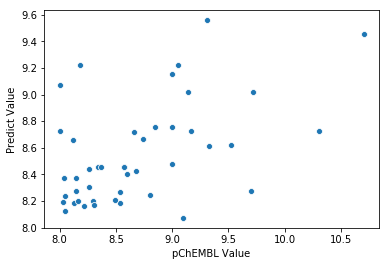

In [35]:
#vykresleni: predikovana vs. zmerena hodnota
#idealne na primce
sns.scatterplot(x = "pChEMBL Value",y = "Predict Value", data=test)

In [37]:
#mira korelace 
r2_score(test["pChEMBL Value"],test["Predict Value"]) #nevychazi moc dobre (dava i zaporne hodnoty)

0.18799484313858195

In [40]:
mean_squared_error(test["pChEMBL Value"],test["Predict Value"])

0.31154825956439114

In [44]:
math.sqrt(mean_squared_error(test["pChEMBL Value"],test["Predict Value"]))

0.5581650827169244

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


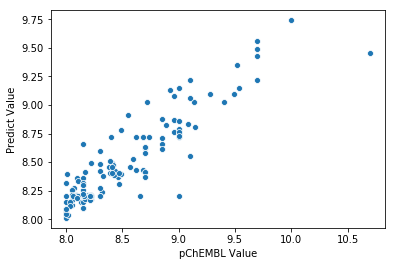

In [45]:
#jakse chova na trenovaci 
train["Predict Value"] = predictor.predict(list(train["FP"]))
sns.scatterplot(x = "pChEMBL Value",y = "Predict Value", data=train)

In [46]:
math.sqrt(mean_squared_error(train["pChEMBL Value"],train["Predict Value"]))

0.2264324938015242

### Cross validace:

In [47]:
#slovnik parametru
param_grid = {"n_estimators":[10,20,30,40]}

In [49]:
cvalidation = model_selection.GridSearchCV(RandomForestRegressor(), param_grid=param_grid) 
#instance prediktoru, slovnik parametru

In [50]:
#vlozeni testovacich dat
cvalidation.fit(list(train["FP"]), list(train["pChEMBL Value"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
#nejlepsi parametry
cvalidation.best_params_

{'n_estimators': 30}

In [54]:
#predikce s nejlepsimi parametry
cvalidation.predict(list(test["FP"]))

array([8.69511032, 9.01366667, 8.40775897, 8.18366667, 8.608     ,
       8.48733333, 8.115     , 8.65866667, 8.44047778, 8.66333333,
       8.344     , 9.43769697, 8.56681818, 8.69511032, 8.32727778,
       8.44047778, 8.44047778, 8.19766667, 8.164     , 8.51956863,
       9.31966667, 8.441     , 8.632     , 8.84616667, 9.43769697,
       8.61916667, 8.27006193, 9.994     , 8.84616667, 8.27006193,
       8.598     , 8.39356667, 8.36253333, 8.44047778, 8.69511032,
       8.29501991, 9.45783333, 8.338     , 8.32566667, 8.27033333,
       8.34933333, 8.16466667, 8.30261564, 8.07633333])

### Prediktor s nejlepsimi hodnotami

In [55]:
predictor = RandomForestRegressor(n_estimators=30)
predictor.fit([fp for fp in train["FP"]], list(train["pChEMBL Value"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
test["Predict Value"] = predictor.predict(list(test["FP"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


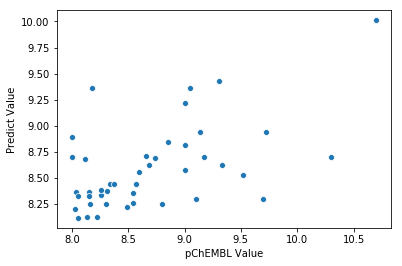

In [57]:
sns.scatterplot(x = "pChEMBL Value",y = "Predict Value", data=test)

In [58]:
math.sqrt(mean_squared_error(test["pChEMBL Value"],test["Predict Value"]))

0.5280047820286998

## To same jen pro MQN

In [63]:
test["MQN"] = [rdMolDescriptors.MQNs_(mol) for mol in test["Molecule"]]
train["MQN"] = [rdMolDescriptors.MQNs_(mol) for mol in train["Molecule"]]

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
predictor2 = RandomForestRegressor(n_estimators=30)
predictor2.fit([fp for fp in train["FP"]], list(train["pChEMBL Value"]))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
train["predict value2"] = predictor2.predict(list(train["FP"]))
test["predict value2"] = predictor2.predict(list(test["FP"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


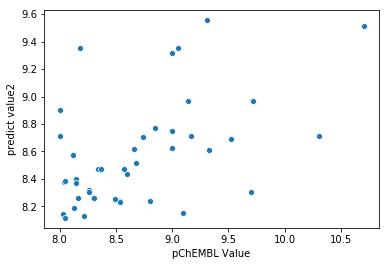

In [66]:
sns.scatterplot(x = "pChEMBL Value",y = "predict value2", data=test)

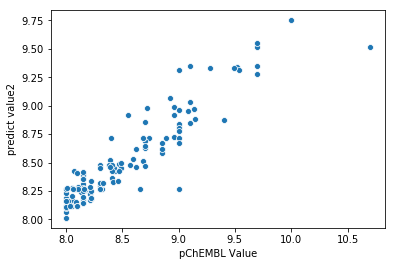

In [67]:
sns.scatterplot(x = "pChEMBL Value",y = "predict value2", data=train)

In [68]:
math.sqrt(mean_squared_error(test["pChEMBL Value"],test["predict value2"]))

0.5472768886700482

In [69]:
math.sqrt(mean_squared_error(train["pChEMBL Value"],train["predict value2"]))

0.20843186350100204

In [ ]:
# vychazi to stejne spatne

### Cross validace - hloubka a pocet stromu

In [70]:
param_grid = {"n_estimators":[10,20,30,40],
             "max_depth":[3,5,7,9]}
validation = model_selection.GridSearchCV(RandomForestRegressor(), param_grid=param_grid) 

In [71]:
validation.fit(list(train["FP"]), list(train["pChEMBL Value"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40], 'max_depth': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
validation.best_params_

{'max_depth': 5, 'n_estimators': 40}

In [76]:
test["predict value3"] = validation.predict(list(test["FP"]))

/home/eva/miniconda3/envs/pnl/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


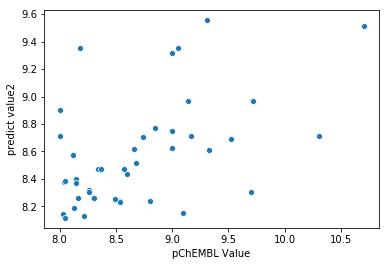

In [77]:
sns.scatterplot(x = "pChEMBL Value",y = "predict value2", data=test)